#Part-1: Dataset and Sentiment Analysis

In [71]:
import pandas as pd
data=pd.read_json('/content/powertoys_2021_10 (1) (1).json')
data

,1,2,3,5,6,9,15,17,18,20,...,6991,6992,6993,6994,6995,6996,6997,6998,6999,7000
body,NaN,Just a few typos I noticed while reading throu...,NaN,I really want a full window manager with pre-s...,"I would love a good, lightweight shortcut key ...",NaN,NaN,expereince -> experience,I want to pin application to non-primary monit...,Add Collapse/Expand button (as seen in the tit...,...,<!--**Important: When reporting BSODs or secur...,## Summary of the Pull RequestExtend the devel...,(Not sure under which category/where to put th...,<!--**Important: When reporting BSODs or secur...,<!--**Important: When reporting BSODs or secur...,## 📝 Provide a description of the new featureW...,## Summary of the Pull RequestDetect potential...,<!--**Important: When reporting BSODs or secur...,The layout of fancyzones depends on the number...,<!--**Important: When reporting BSODs or secur...
closed_at,"05/05/19, 09:22:54 PM","05/09/19, 03:53:16 PM","05/09/19, 03:56:13 PM","07/14/20, 10:35:34 AM","05/19/20, 09:58:53 PM","05/09/19, 03:57:30 PM","05/07/19, 08:15:53 PM","05/08/19, 03:19:37 AM","02/23/21, 08:11:46 PM","02/22/20, 12:24:50 AM",...,"10/10/20, 09:03:48 AM","10/18/20, 02:00:30 PM","03/26/21, 06:46:11 PM","10/14/20, 01:01:04 PM","10/05/20, 01:34:02 PM","10/04/20, 08:29:57 AM","10/08/20, 11:16:33 PM","11/02/20, 01:01:04 PM","10/04/20, 06:03:12 AM","10/04/20, 05:55:22 AM"
created_at,"05/05/19, 09:22:26 PM","05/06/19, 11:33:59 PM","05/07/19, 12:13:02 AM","05/07/19, 01:43:45 AM","05/07/19, 01:53:45 AM","05/07/19, 03:37:11 AM","05/07/19, 08:15:14 PM","05/08/19, 03:18:53 AM","05/08/19, 09:38:37 AM","05/08/19, 02:03:17 PM",...,"10/03/20, 10:14:11 AM","10/03/20, 11:34:25 AM","10/03/20, 12:56:46 PM","10/03/20, 02:08:09 PM","10/03/20, 02:11:07 PM","10/03/20, 04:01:11 PM","10/03/20, 07:03:56 PM","10/03/20, 07:08:32 PM","10/03/20, 08:37:07 PM","10/03/20, 08:53:12 PM"
num_comments,0,1,1,12,44,1,1,0,2,5,...,6,2,8,2,20,2,4,14,1,1
title,Pushing the first main update to master,fix a couple typos,Update README.md,"Full window manager, including layouts",Keyboard shortcut manager,s/expereince/experience,Fixe typo,Fix typo in README.md,Pin applications to the second monitor taskbar,Add Collapse/Expand button to Title Bars,...,FancyZones only lets you set left and right of...,Dev doc update toolset142,Log parser for PowerToys,Sometimes the hotkey of Shortcut Guide doesn't...,Power Toys Uninstalled itself Overnight,[ColorPicker] Add more color formats (better k...,Detect potential errors copying metadata and a...,[PowerToys Run] not working without error dialog.,Adaptable Fancy Zones,FancyZones Zone Editor crashes when invoked
userid,18598712,30301021,8421414,192942,192942,50206,12934716,1261965,903197,4219926,...,16735375,17874713,36262995,57581480,32961763,17874713,1694080,70777965,69609078,50929928
userlogin,indierawk2k2,corbob,nnpcYvIVl,Jaykul,Jaykul,tomer,LifeIsStrange,Roon,Domain,LtCmdrKeene,...,pmtate,TobiasSekan,LiorBanai,SherkeyXD,ITCMD,TobiasSekan,tonymitchell,OcamsLightsaber,ReedMLokken,RexLuscus56
comments,{},{'0': {'body': 'Merged. Thank you for your con...,"{'0': {'body': 'Hi, this was already merged in...",{'0': {'body': 'It'd be a bit of a stretch but...,{'0': {'body': 'Would love to see something th...,{'0': {'body': 'Merged. Thank you for the cont...,{'0': {'body': 'There's already a pull request...,{},{'0': {'body': 'This is something I want too b...,{'0': {'body': 'bunch of those are up to the a...,...,{'0': {'body': 'Seems to be an issue with Chro...,{'0': {'body': '@crutkas when i use only the `...,"{'0': {'body': 'Oh wow. Great work.', 'userid'...","{'0': {'body': '@YogurtZebra when that happen,...",{'0': {'body': '`%appdata%\..\Roaming\Microsof...,{'0': {'body': '@TobiasSekan isn't this alread...,{'0': {'body': '@crutkas I would revert this u...,"{'0': {'body': '@OcamsLightsaber, can you plea...",{'0': {'body': 'Duplicate of https://github.co...,{'0': {'body': '@RexLuscus56 thanks for report...


The fragment below shows an example: Issue 6 has a title, body (text), user that posted it, dates of creation and close, and 44 comments. The comments are numbered in sequence with the user and body.
Goal 1: run a sentiment analysis to identify positive, neutral, and negative comments.



In [73]:
data[6]['comments']

{'0': {'body': 'Would love to see something that allows one to view and possibly alter the system hotkey table.  This has been sorely missing from Windows for its whole history, so would be really helpful!',
  'userid': '2551899',
  'userlogin': 'orev'},
 '1': {'body': 'I subscribed to GitHub just to to say it would be wonderful',
  'userid': '50415623',
  'userlogin': 'ganeloni'},
 '2': {'body': 'Massive extra points for some pre-loaded shortcut "themes," like maybe a vim theme and an Emacs theme.',
  'userid': '916340',
  'userlogin': 'EvansWinner'},
 '3': {'body': 'throw in autotype:ctrl+shift+u => types that long url you have to use all the time',
  'userid': '13918530',
  'userlogin': 'kort3x'},
 '4': {'body': 'If this is not added, you can try AutoHotKey and get many of the requested features',
  'userid': '50466615',
  'userlogin': 'gargoylemike'},
 '5': {'body': '> Bonus points if you can tell me who registered which hotkeys, so I can find and kill OneNote when it clobbers the 

In [74]:
data.describe()

,1,2,3,5,6,9,15,17,18,20,...,6991,6992,6993,6994,6995,6996,6997,6998,6999,7000
count,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
unique,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
top,NaN,Just a few typos I noticed while reading throu...,NaN,I really want a full window manager with pre-s...,"I would love a good, lightweight shortcut key ...",NaN,NaN,expereince -> experience,I want to pin application to non-primary monit...,Add Collapse/Expand button (as seen in the tit...,...,<!--**Important: When reporting BSODs or secur...,## Summary of the Pull RequestExtend the devel...,(Not sure under which category/where to put th...,<!--**Important: When reporting BSODs or secur...,<!--**Important: When reporting BSODs or secur...,## 📝 Provide a description of the new featureW...,## Summary of the Pull RequestDetect potential...,<!--**Important: When reporting BSODs or secur...,The layout of fancyzones depends on the number...,<!--**Important: When reporting BSODs or secur...
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [75]:
# Extract relevant fields from JSON and create a DataFrame
issues = []
for issue_id, issue_data in data.items():
    if 'comments' in issue_data and issue_data['comments']:
        for comment_id, comment_info in issue_data['comments'].items():
            issues.append({
                'issue_id': issue_id,
                'comment_id': comment_id,
                'body': comment_info['body'],
                'userid': comment_info['userid'],
                'userlogin': comment_info['userlogin'],
                'created_at': issue_data['created_at'],
                'closed_at': issue_data['closed_at']
            })

df = pd.DataFrame(issues)

In [76]:
df

,issue_id,comment_id,body,userid,userlogin,created_at,closed_at
0,2,0,Merged. Thank you for your contribution!,26118718,jaimecbernardo,"05/06/19, 11:33:59 PM","05/09/19, 03:53:16 PM"
1,3,0,"Hi, this was already merged in https://github....",26118718,jaimecbernardo,"05/07/19, 12:13:02 AM","05/09/19, 03:56:13 PM"
2,5,0,It'd be a bit of a stretch but something like ...,5257450,jcotton42,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM"
3,5,1,"I came here to say, ""i3 for Windows!"" and was ...",4878259,zbrozek,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM"
4,5,2,"If I could add on to this, I would ask that it...",2480667,mattferderer,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM"
...,...,...,...,...,...,...,...
23100,6998,11,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM"
23101,6998,12,![image](https://user-images.githubusercontent...,17876931,Freakboy,"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM"
23102,6998,13,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM"
23103,6999,0,Duplicate of https://github.com/microsoft/Powe...,3206696,enricogior,"10/03/20, 08:37:07 PM","10/04/20, 06:03:12 AM"


In [77]:
from textblob import TextBlob

# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [78]:

# Function to detect burnout-related keywords
def detect_burnout(text):
    burnout_keywords = [
    'burnout', 'exhausted', 'overwhelmed', 'stress', 'fatigue', 'drained', 'demotivated',
    'frustrated', 'depleted', 'weary', 'disheartened', 'apathy', 'listless', 'disengaged',
    'disillusioned', 'dismayed', 'lackluster', 'tired', 'worn out', 'run down', 'depressed',
    'bored', 'lethargic', 'unmotivated', 'sapped', 'jaded', 'emotionally drained', 'strained',
    'dispirited', 'uninspired', 'burned out', 'low energy', 'mental exhaustion', 'physical exhaustion',
    'feeling drained', 'feeling exhausted', 'mental fatigue', 'feeling overwhelmed', 'burned-out',
    'feeling tired', 'feeling stressed', 'emotional exhaustion', 'feeling fatigued', 'feeling depleted',
    'feeling drained', 'feeling demotivated', 'feeling frustrated', 'feeling disheartened', 'feeling listless',
    'feeling disengaged', 'feeling disillusioned', 'feeling dismayed', 'feeling lackluster', 'feeling worn out',
    'feeling run down', 'feeling bored', 'feeling lethargic', 'feeling unmotivated', 'feeling sapped',
    'feeling jaded', 'feeling strained', 'feeling dispirited', 'feeling uninspired', 'emotionally exhausted',
    'feeling emotionally drained', 'feeling mentally exhausted', 'feeling physically exhausted'
    ]

    for keyword in burnout_keywords:
        if keyword in text.lower():
            return 'Yes'
    return 'No'



In [81]:
# Apply sentiment analysis and burnout detection to the DataFrame
df['sentiment'] = df['body'].apply(get_sentiment)
df['sentiment']


0         Neutral
1         Neutral
2         Neutral
3        Positive
4         Neutral
           ...   
23100    Negative
23101    Negative
23102    Negative
23103     Neutral
23104    Positive
Name: sentiment, Length: 23105, dtype: object

In [82]:
df['burnout'] = df['body'].apply(detect_burnout)
df['burnout']

0        No
1        No
2        No
3        No
4        No
         ..
23100    No
23101    No
23102    No
23103    No
23104    No
Name: burnout, Length: 23105, dtype: object

In [84]:
df

,issue_id,comment_id,body,userid,userlogin,created_at,closed_at,sentiment,burnout
0,2,0,Merged. Thank you for your contribution!,26118718,jaimecbernardo,"05/06/19, 11:33:59 PM","05/09/19, 03:53:16 PM",Neutral,No
1,3,0,"Hi, this was already merged in https://github....",26118718,jaimecbernardo,"05/07/19, 12:13:02 AM","05/09/19, 03:56:13 PM",Neutral,No
2,5,0,It'd be a bit of a stretch but something like ...,5257450,jcotton42,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No
3,5,1,"I came here to say, ""i3 for Windows!"" and was ...",4878259,zbrozek,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Positive,No
4,5,2,"If I could add on to this, I would ask that it...",2480667,mattferderer,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No
...,...,...,...,...,...,...,...,...,...
23100,6998,11,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No
23101,6998,12,![image](https://user-images.githubusercontent...,17876931,Freakboy,"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No
23102,6998,13,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No
23103,6999,0,Duplicate of https://github.com/microsoft/Powe...,3206696,enricogior,"10/03/20, 08:37:07 PM","10/04/20, 06:03:12 AM",Neutral,No


Analyze Emotion and intention

In [85]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze emotion based on sentiment score
def analyze_emotion(sentiment_score):
    if sentiment_score > 0.5:
        return 'joy'
    elif sentiment_score > 0:
        return 'happiness'
    elif sentiment_score < -0.5:
        return 'anger'
    elif sentiment_score < 0:
        return 'sadness'
    else:
        return 'neutral'

In [86]:
# Function to determine intention based on comment content
def analyze_intention(comment):
    blob = TextBlob(comment)
    main_verb = None

    # Extract the main verb from the comment
    for word, pos in blob.tags:
        if pos.startswith('VB'):  # VB indicates a verb in TextBlob's tagging
            main_verb = word
            break

    # Map the main verb to intention categories
    if main_verb in ['suggest', 'propose', 'recommend', 'advise']:
        return 'suggestion'
    elif main_verb in ['ask', 'request', 'query']:
        return 'request'
    elif main_verb in ['welcome', 'greet']:
        return 'welcoming'
    else:
        return 'other'


In [87]:
# Apply sentiment analysis and derive emotion
df['sentiment_score'] = df['body'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_score']

0        0.4199
1        0.3612
2        0.8047
3        0.1742
4        0.0000
          ...  
23100   -0.4215
23101    0.0000
23102   -0.4215
23103    0.0000
23104    0.0516
Name: sentiment_score, Length: 23105, dtype: float64

In [88]:
df['emotion'] = df['sentiment_score'].apply(analyze_emotion)
df['emotion']

0        happiness
1        happiness
2              joy
3        happiness
4          neutral
           ...    
23100      sadness
23101      neutral
23102      sadness
23103      neutral
23104    happiness
Name: emotion, Length: 23105, dtype: object

In [89]:
# Apply intention analysis
df['intention'] = df['body'].apply(analyze_intention)
df['intention']

0        other
1        other
2        other
3        other
4        other
         ...  
23100    other
23101    other
23102    other
23103    other
23104    other
Name: intention, Length: 23105, dtype: object

In [90]:

# Drop the intermediate sentiment_score column
df.drop('sentiment_score', axis=1, inplace=True)

# Display the DataFrame with emotion and intention columns
print(df)



       issue_id comment_id                                               body  \
0             2          0           Merged. Thank you for your contribution!   
1             3          0  Hi, this was already merged in https://github....   
2             5          0  It'd be a bit of a stretch but something like ...   
3             5          1  I came here to say, "i3 for Windows!" and was ...   
4             5          2  If I could add on to this, I would ask that it...   
...         ...        ...                                                ...   
23100      6998         11  This issue has been automatically marked as st...   
23101      6998         12  ![image](https://user-images.githubusercontent...   
23102      6998         13  This issue has been automatically marked as st...   
23103      6999          0  Duplicate of https://github.com/microsoft/Powe...   
23104      7000          0  @RexLuscus56 thanks for reporting the issue, w...   

         userid       userl

In [91]:
df

,issue_id,comment_id,body,userid,userlogin,created_at,closed_at,sentiment,burnout,emotion,intention
0,2,0,Merged. Thank you for your contribution!,26118718,jaimecbernardo,"05/06/19, 11:33:59 PM","05/09/19, 03:53:16 PM",Neutral,No,happiness,other
1,3,0,"Hi, this was already merged in https://github....",26118718,jaimecbernardo,"05/07/19, 12:13:02 AM","05/09/19, 03:56:13 PM",Neutral,No,happiness,other
2,5,0,It'd be a bit of a stretch but something like ...,5257450,jcotton42,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No,joy,other
3,5,1,"I came here to say, ""i3 for Windows!"" and was ...",4878259,zbrozek,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Positive,No,happiness,other
4,5,2,"If I could add on to this, I would ask that it...",2480667,mattferderer,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No,neutral,other
...,...,...,...,...,...,...,...,...,...,...,...
23100,6998,11,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,sadness,other
23101,6998,12,![image](https://user-images.githubusercontent...,17876931,Freakboy,"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,neutral,other
23102,6998,13,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,sadness,other
23103,6999,0,Duplicate of https://github.com/microsoft/Powe...,3206696,enricogior,"10/03/20, 08:37:07 PM","10/04/20, 06:03:12 AM",Neutral,No,neutral,other


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23105 entries, 0 to 23104
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   issue_id    23105 non-null  int64 
 1   comment_id  23105 non-null  object
 2   body        23105 non-null  object
 3   userid      23105 non-null  object
 4   userlogin   23105 non-null  object
 5   created_at  23105 non-null  object
 6   closed_at   23105 non-null  object
 7   sentiment   23105 non-null  object
 8   burnout     23105 non-null  object
 9   emotion     23105 non-null  object
 10  intention   23105 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.9+ MB


In [94]:
df.describe()

,issue_id
count,23105.000000
mean,3424.449080
std,2059.600507
min,2.000000
25%,1566.000000
50%,3472.000000
75%,5168.000000
max,7000.000000


In [95]:
df_6=df[df['issue_id'] == 6]
df_6

,issue_id,comment_id,body,userid,userlogin,created_at,closed_at,sentiment,burnout,emotion,intention
14,6,0,Would love to see something that allows one to...,2551899,orev,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Positive,No,joy,other
15,6,1,I subscribed to GitHub just to to say it would...,50415623,ganeloni,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Positive,No,joy,other
16,6,2,Massive extra points for some pre-loaded short...,916340,EvansWinner,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Neutral,No,happiness,other
17,6,3,throw in autotype:ctrl+shift+u => types that l...,13918530,kort3x,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Negative,No,neutral,other
18,6,4,"If this is not added, you can try AutoHotKey a...",50466615,gargoylemike,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Positive,No,neutral,other
19,6,5,> Bonus points if you can tell me who register...,4093170,bloomtom,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Positive,No,happiness,other
20,6,6,You want [The Wonderful Icon](https://github.c...,1389841,belg4mit,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Positive,No,joy,other
21,6,7,"> > > If this is not added, you can try AutoHo...",33688532,Ronsss,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Positive,No,joy,other
22,6,8,+1,34165628,GingerGraham,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Neutral,No,neutral,other
23,6,9,for keyboard shortcuts to be useful in Power T...,38077532,marypcbuk,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Positive,No,happiness,other


In [96]:
# Manually classify burnout comments based on a keyword
manual_classification = {
    'Comment #1': 'Burnout = Yes',
    'Comment #2': 'Burnout = No'
}

# Update DataFrame with manual classification
for comment_id, classification in manual_classification.items():
    comment_index = df[df['comment_id'] == comment_id].index
    if not comment_index.empty:  # Check if comment_index is not empty
        df.loc[comment_index, 'manual_classification'] = classification


In [97]:
df

,issue_id,comment_id,body,userid,userlogin,created_at,closed_at,sentiment,burnout,emotion,intention
0,2,0,Merged. Thank you for your contribution!,26118718,jaimecbernardo,"05/06/19, 11:33:59 PM","05/09/19, 03:53:16 PM",Neutral,No,happiness,other
1,3,0,"Hi, this was already merged in https://github....",26118718,jaimecbernardo,"05/07/19, 12:13:02 AM","05/09/19, 03:56:13 PM",Neutral,No,happiness,other
2,5,0,It'd be a bit of a stretch but something like ...,5257450,jcotton42,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No,joy,other
3,5,1,"I came here to say, ""i3 for Windows!"" and was ...",4878259,zbrozek,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Positive,No,happiness,other
4,5,2,"If I could add on to this, I would ask that it...",2480667,mattferderer,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No,neutral,other
...,...,...,...,...,...,...,...,...,...,...,...
23100,6998,11,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,sadness,other
23101,6998,12,![image](https://user-images.githubusercontent...,17876931,Freakboy,"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,neutral,other
23102,6998,13,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,sadness,other
23103,6999,0,Duplicate of https://github.com/microsoft/Powe...,3206696,enricogior,"10/03/20, 08:37:07 PM","10/04/20, 06:03:12 AM",Neutral,No,neutral,other


In [98]:
# Assuming your DataFrame is named 'data'

# Count the number of comments labeled as "Burnout = Yes" and "Burnout = No"
burnout_counts = df['burnout'].value_counts()

# Print the counts
print("Burnout = Yes count:", burnout_counts.get('Yes', 0))
print("Burnout = No count:", burnout_counts.get('No', 0))


Burnout = Yes count: 21
Burnout = No count: 23084


In [99]:
# Save the updated DataFrame to a new CSV file
df.to_csv('processed_data.csv', index=False)

#Part-2

In [128]:
df=pd.read_csv('/content/processed_data.csv')
df

,issue_id,comment_id,body,userid,userlogin,created_at,closed_at,sentiment,burnout,emotion,intention
0,2,0,Merged. Thank you for your contribution!,26118718,jaimecbernardo,"05/06/19, 11:33:59 PM","05/09/19, 03:53:16 PM",Neutral,No,happiness,other
1,3,0,"Hi, this was already merged in https://github....",26118718,jaimecbernardo,"05/07/19, 12:13:02 AM","05/09/19, 03:56:13 PM",Neutral,No,happiness,other
2,5,0,It'd be a bit of a stretch but something like ...,5257450,jcotton42,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No,joy,other
3,5,1,"I came here to say, ""i3 for Windows!"" and was ...",4878259,zbrozek,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Positive,No,happiness,other
4,5,2,"If I could add on to this, I would ask that it...",2480667,mattferderer,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No,neutral,other
...,...,...,...,...,...,...,...,...,...,...,...
23100,6998,11,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,sadness,other
23101,6998,12,![image](https://user-images.githubusercontent...,17876931,Freakboy,"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,neutral,other
23102,6998,13,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,sadness,other
23103,6999,0,Duplicate of https://github.com/microsoft/Powe...,3206696,enricogior,"10/03/20, 08:37:07 PM","10/04/20, 06:03:12 AM",Neutral,No,neutral,other


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23105 entries, 0 to 23104
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   issue_id    23105 non-null  int64 
 1   comment_id  23105 non-null  int64 
 2   body        23105 non-null  object
 3   userid      23105 non-null  int64 
 4   userlogin   23105 non-null  object
 5   created_at  23105 non-null  object
 6   closed_at   23105 non-null  object
 7   sentiment   23105 non-null  object
 8   burnout     23105 non-null  object
 9   emotion     23105 non-null  object
 10  intention   23105 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [130]:
from sklearn.preprocessing import LabelEncoder



# Convert 'Yes' to 1 and 'No' to 0 in the 'burnout' column
df['burnout'] = df['burnout'].replace({'Yes': 1, 'No': 0})

# Convert sentiment, emotion, intention to int using LabelEncoder
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
df['emotion'] = label_encoder.fit_transform(df['emotion'])
df['intention'] = label_encoder.fit_transform(df['intention'])

# Now df contains the converted columns as integers
print(df.head(5))


   issue_id  comment_id                                               body  \
0         2           0           Merged. Thank you for your contribution!   
1         3           0  Hi, this was already merged in https://github....   
2         5           0  It'd be a bit of a stretch but something like ...   
3         5           1  I came here to say, "i3 for Windows!" and was ...   
4         5           2  If I could add on to this, I would ask that it...   

     userid       userlogin             created_at              closed_at  \
0  26118718  jaimecbernardo  05/06/19, 11:33:59 PM  05/09/19, 03:53:16 PM   
1  26118718  jaimecbernardo  05/07/19, 12:13:02 AM  05/09/19, 03:56:13 PM   
2   5257450       jcotton42  05/07/19, 01:43:45 AM  07/14/20, 10:35:34 AM   
3   4878259         zbrozek  05/07/19, 01:43:45 AM  07/14/20, 10:35:34 AM   
4   2480667    mattferderer  05/07/19, 01:43:45 AM  07/14/20, 10:35:34 AM   

   sentiment  burnout  emotion  intention  
0          1        0   

In [131]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Yes' to 1 and 'No' to 0 in the 'burnout' column
df['burnout'] = df['burnout'].replace({'Yes': 1, 'No': 0})


df['sentiment'] = df['sentiment'].replace({'Positive': 1, 'Neutral': 0,'Negative': -1})
df['emotion'] = df['emotion'].replace({'joy': 5, 'happiness': 4,'anger': 1,'sadness': 2,'neutral': 3})
df['intention'] = df['intention'].replace({'suggestion': 5, 'request': 4,'welcoming': 1,'other': 2})

# Now df contains the converted columns as integers
print(df.head())



   issue_id  comment_id                                               body  \
0         2           0           Merged. Thank you for your contribution!   
1         3           0  Hi, this was already merged in https://github....   
2         5           0  It'd be a bit of a stretch but something like ...   
3         5           1  I came here to say, "i3 for Windows!" and was ...   
4         5           2  If I could add on to this, I would ask that it...   

     userid       userlogin             created_at              closed_at  \
0  26118718  jaimecbernardo  05/06/19, 11:33:59 PM  05/09/19, 03:53:16 PM   
1  26118718  jaimecbernardo  05/07/19, 12:13:02 AM  05/09/19, 03:56:13 PM   
2   5257450       jcotton42  05/07/19, 01:43:45 AM  07/14/20, 10:35:34 AM   
3   4878259         zbrozek  05/07/19, 01:43:45 AM  07/14/20, 10:35:34 AM   
4   2480667    mattferderer  05/07/19, 01:43:45 AM  07/14/20, 10:35:34 AM   

   sentiment  burnout  emotion  intention  
0          1        0   

In [132]:
df

,issue_id,comment_id,body,userid,userlogin,created_at,closed_at,sentiment,burnout,emotion,intention
0,2,0,Merged. Thank you for your contribution!,26118718,jaimecbernardo,"05/06/19, 11:33:59 PM","05/09/19, 03:53:16 PM",1,0,1,0
1,3,0,"Hi, this was already merged in https://github....",26118718,jaimecbernardo,"05/07/19, 12:13:02 AM","05/09/19, 03:56:13 PM",1,0,1,0
2,5,0,It'd be a bit of a stretch but something like ...,5257450,jcotton42,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",1,0,2,0
3,5,1,"I came here to say, ""i3 for Windows!"" and was ...",4878259,zbrozek,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",2,0,1,0
4,5,2,"If I could add on to this, I would ask that it...",2480667,mattferderer,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
23100,6998,11,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",0,0,4,0
23101,6998,12,![image](https://user-images.githubusercontent...,17876931,Freakboy,"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",0,0,3,0
23102,6998,13,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",0,0,4,0
23103,6999,0,Duplicate of https://github.com/microsoft/Powe...,3206696,enricogior,"10/03/20, 08:37:07 PM","10/04/20, 06:03:12 AM",1,0,3,0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23105 entries, 0 to 23104
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   issue_id    23105 non-null  int64 
 1   comment_id  23105 non-null  int64 
 2   body        23105 non-null  object
 3   userid      23105 non-null  int64 
 4   userlogin   23105 non-null  object
 5   created_at  23105 non-null  object
 6   closed_at   23105 non-null  object
 7   sentiment   23105 non-null  int64 
 8   burnout     23105 non-null  int64 
 9   emotion     23105 non-null  int64 
 10  intention   23105 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.9+ MB


In [134]:
df.drop(columns=['userlogin', 'created_at', 'closed_at'], inplace=True)


In [135]:
df

,issue_id,comment_id,body,userid,sentiment,burnout,emotion,intention
0,2,0,Merged. Thank you for your contribution!,26118718,1,0,1,0
1,3,0,"Hi, this was already merged in https://github....",26118718,1,0,1,0
2,5,0,It'd be a bit of a stretch but something like ...,5257450,1,0,2,0
3,5,1,"I came here to say, ""i3 for Windows!"" and was ...",4878259,2,0,1,0
4,5,2,"If I could add on to this, I would ask that it...",2480667,1,0,3,0
...,...,...,...,...,...,...,...,...
23100,6998,11,This issue has been automatically marked as st...,48340428,0,0,4,0
23101,6998,12,![image](https://user-images.githubusercontent...,17876931,0,0,3,0
23102,6998,13,This issue has been automatically marked as st...,48340428,0,0,4,0
23103,6999,0,Duplicate of https://github.com/microsoft/Powe...,3206696,1,0,3,0


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


# Concatenate text from issue title, issue body, and comment bodies into one corpus
df['corpus'] = df['body']  # Assuming 'body' contains the text data for simplicity

# Drop rows with empty 'corpus' column
df.dropna(subset=['corpus'], inplace=True)

# TF-IDF vectorization for 'corpus'
tfidf = TfidfVectorizer(max_features=1000)  # Use 1000 features for example
X_corpus = tfidf.fit_transform(df['corpus'])

# Convert other features to numerical data
X_other = df[['sentiment', 'emotion', 'intention']].values

# Concatenate TF-IDF features and other numerical features
X = np.hstack((X_corpus.toarray(), X_other))

# Target variable
y = df['burnout']
X

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 2., 0.],
       ...,
       [0., 0., 0., ..., 0., 4., 0.],
       [0., 0., 0., ..., 1., 3., 0.],
       [0., 0., 0., ..., 2., 1., 0.]])

In [150]:
y

0        0
1        0
2        0
3        0
4        0
        ..
23100    0
23101    0
23102    0
23103    0
23104    0
Name: burnout, Length: 23105, dtype: int64

In [154]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build an Artificial Neural Network (ANN) model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")


Epoch 1/20
506/506 [==============================] - 3s 4ms/step - loss: 0.0518 - accuracy: 0.9910 - val_loss: 0.0081 - val_accuracy: 0.9991
Epoch 2/20
506/506 [==============================] - 2s 3ms/step - loss: 0.0112 - accuracy: 0.9990 - val_loss: 0.0082 - val_accuracy: 0.9991
Epoch 3/20
506/506 [==============================] - 2s 4ms/step - loss: 0.0094 - accuracy: 0.9990 - val_loss: 0.0082 - val_accuracy: 0.9991
Epoch 4/20
109/109 [==============================] - 0s 2ms/step


109/109 [==============================] - 0s 4ms/step


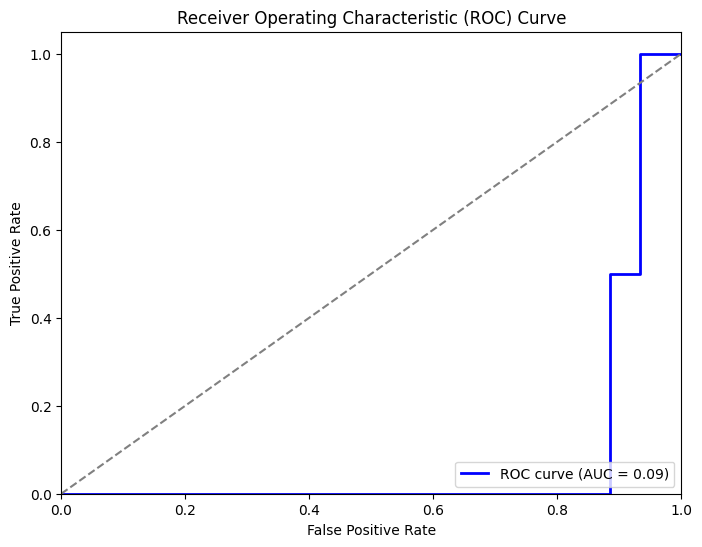

In [156]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predicted probabilities for positive class (class 1)
y_prob = model.predict(X_test)

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [157]:




# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3464
           1       0.00      0.00      0.00         2

    accuracy                           1.00      3466
   macro avg       0.50      0.50      0.50      3466
weighted avg       1.00      1.00      1.00      3466



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


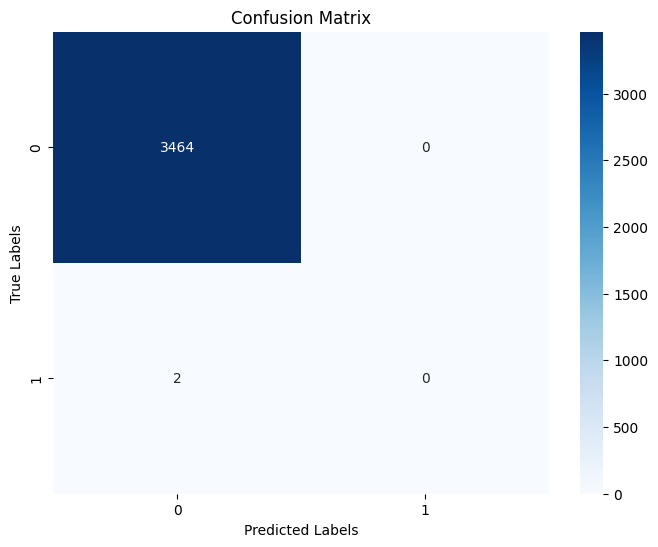

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
